In [1]:
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [2]:
path_pheno = 'data/pheno.csv'
path_geno = 'data/geno.csv'

In [3]:
df_geno = pd.read_csv(path_geno)
print(len(df_geno.index))
df_geno.head(2)

5011


,Haplotype/Marker,Chr.,Sequence,Start Pos.,55 CL 2,ACA 201,ACA 202,ACA 223,ACA 320,ACA 801,ACA 901,ACA 903 B,ACA 906,ACA 907,BAGUETTE 10,...,LE 2330,LE 2331,LE 2333,LE 2341,MARCOS JUÁREZ INTA,OLAETA ARTILLERO,PROINTA ELITE,PROINTA GAUCHO,PROINTA GRANAR,PROINTA GUAZÚ,PROINTA ISLA VERDE,PROINTA OASIS,SIRIRÍ,SINVALOCHO MA,SRM NOGAL
0,Chr1A-B1-Hap1,1A,GGTGATTGTCAAGCAGTTTT,1145919,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chr1A-B1-Hap2,1A,GGTGATTGTCAGACAGTTAT,1145919,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [4]:
df_pheno = pd.read_csv(path_pheno)
print(len(df_pheno.index))
df_pheno.head(2)

1122


,Taxa,Ambiente,HD,PH,FE,TKW,KNS
0,55 CL 2,Balcarce_2013,106.5,88.0,77.41,40.16,57.72
1,ACA 201,Balcarce_2013,130.5,88.0,70.91,41.99,49.33


In [5]:
#genotypes ordering

In [6]:
df_geno.drop(columns={'Chr.','Sequence','Start Pos.'}, inplace=True)

In [7]:
df_geno.head(2)

,Haplotype/Marker,55 CL 2,ACA 201,ACA 202,ACA 223,ACA 320,ACA 801,ACA 901,ACA 903 B,ACA 906,ACA 907,BAGUETTE 10,BAGUETTE 17,BAGUETTE 18,BAGUETTE 19,...,LE 2330,LE 2331,LE 2333,LE 2341,MARCOS JUÁREZ INTA,OLAETA ARTILLERO,PROINTA ELITE,PROINTA GAUCHO,PROINTA GRANAR,PROINTA GUAZÚ,PROINTA ISLA VERDE,PROINTA OASIS,SIRIRÍ,SINVALOCHO MA,SRM NOGAL
0,Chr1A-B1-Hap1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Chr1A-B1-Hap2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


In [8]:
df_geno = df_geno.transpose()
df_geno.columns = df_geno.iloc[0]
df_geno = df_geno.iloc[1:]


In [9]:
df_geno.head(3)

Haplotype/Marker,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B12-Hap3,Chr7D-B13-Hap1,Chr7D-B13-Hap2,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1
55 CL 2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1
ACA 201,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1
ACA 202,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,1,0,0,1,0,1,1,0,1,1


In [10]:
df_geno['Taxa'] = df_geno.index

In [11]:
df_geno.head(3)

Haplotype/Marker,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B13-Hap1,Chr7D-B13-Hap2,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1,Taxa
55 CL 2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2
ACA 201,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,1,1,0,1,1,ACA 201
ACA 202,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1,1,0,1,1,ACA 202


In [12]:
#phenotypes ordering

In [13]:
df_pheno.head(2)

,Taxa,Ambiente,HD,PH,FE,TKW,KNS
0,55 CL 2,Balcarce_2013,106.5,88.0,77.41,40.16,57.72
1,ACA 201,Balcarce_2013,130.5,88.0,70.91,41.99,49.33


In [14]:
Y = 'FE'
df_res = pd.merge(df_geno, df_pheno[['Taxa','Ambiente',Y]], on='Taxa')
print(len(df_res.index))
df_res.head(2)

1122


,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1,Taxa,Ambiente,FE
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2013,77.41
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2014,79.80


In [15]:
df_res.shape

(1122, 5014)

In [16]:
nans=pd.isnull(df_res).sum()
nans[nans>0]

FE    122
dtype: int64

In [17]:
df_res = df_res[df_res.FE.notnull()]

In [18]:
nans=pd.isnull(df_res).sum()
nans[nans>0]
print(len(df_res.index))


1000


In [19]:
df_res.dtypes.value_counts()


object     5013
float64       1
dtype: int64

In [20]:
df_res.head(2)

,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1,Taxa,Ambiente,FE
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2013,77.41
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2014,79.80


In [21]:
df_res['FE'] = np.log1p(df_res['FE'])


In [22]:
df_res.head(2)

,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1,Taxa,Ambiente,FE
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2013,4.361951
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,Balcarce_2014,4.391977


In [23]:
# label encoding
le = preprocessing.LabelEncoder()

In [24]:
le.fit(df_res.Ambiente)

LabelEncoder()

In [25]:
le.classes_

array(['Azul_2013', 'Azul_2014', 'Balcarce_2013', 'Balcarce_2014',
       'Balcarce_2015', 'MsJz_2012', 'MsJz_2013', 'MsJz_2014',
       'MsJz_2015', 'MsJz_2016'], dtype=object)

In [26]:
df_res.Ambiente = le.transform(df_res.Ambiente) 

In [27]:
df_res.head(2)

,Chr1A-B1-Hap1,Chr1A-B1-Hap2,Chr1A-B1-Hap3,Chr1A-B1-Hap4,Chr1A-B1-Hap5,Chr1A-B1-Hap6,Chr1A-B1-Hap7,Chr1A-B2-Hap1,Chr1A-B2-Hap2,Chr1A-B2-Hap3,Chr1A-B2-Hap4,Chr1A-B3-Hap1,Chr1A-B3-Hap2,Chr1A-B3-Hap3,Chr1A-B4-Hap1,...,Chr7D-B13-Hap3,AX-94616800,Chr7D-B14-Hap1,Chr7D-B14-Hap2,Chr7D-B14-Hap3,Chr7D-B15-Hap1,Chr7D-B15-Hap2,AX-95152265,AX-94653866,Chr7D-B16-Hap1,Chr7D-B16-Hap2,Chr7D-B17-Hap1,Taxa,Ambiente,FE
0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,2,4.361951
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,1,1,1,0,1,55 CL 2,3,4.391977


In [52]:
df_res.to_csv('data/data.csv', index=None, sep=',')

In [28]:
X = df_res.drop('FE', axis=1).drop('Taxa', axis=1)
y = df_res.FE


In [29]:
X_train, X_test , y_train, y_test = train_test_split(X, y)


In [30]:
# Scale the data to be between -1 and 1
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)


In [31]:
len(X_train.index), len(X_test.index)

(750, 250)

In [47]:
model = svm.SVR(kernel="rbf")


In [48]:
model.fit(X_train,y_train)


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
model.score(X_test, y_test)


0.46420741135701493

In [51]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)


linear 0.4711606320769623


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly 0.15962796215698416


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf 0.46420741135701493


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


sigmoid 0.4643897114970022


In [50]:
pred=model.predict(X_test)
print(model.score(X_test,y_test))
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.46420741135701493
0.46420741135701493


/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/b

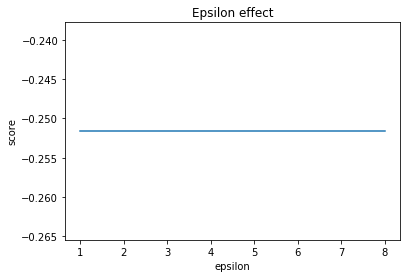

In [389]:
epsilons = np.arange(1, 9)
scores = []
for e in epsilons:
    model.set_params(epsilon=e)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(epsilons, scores)
plt.title("Epsilon effect")
plt.xlabel("epsilon")
plt.ylabel("score")
plt.show()

/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/bio/venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/juan/Desktop/juan/b

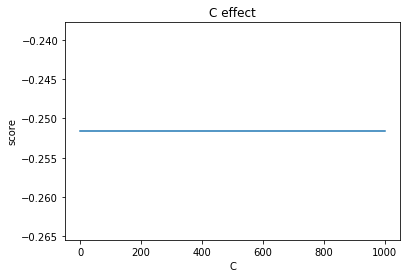

In [390]:
# Try other C's - This will take about a minute or so
model.set_params(epsilon=5)
Cs = [1e0, 1e1, 1e2, 1e3]
scores = []
for c in Cs:
    model.set_params(C=c)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.plot(Cs, scores)
plt.title("C effect")
plt.xlabel("C")
plt.ylabel("score")
plt.show()